# Obesity Risk Prediction Model
This notebook develops a classification model to predict individuals at high risk for obesity based on demographic and lifestyle features. It includes data loading, preprocessing, exploratory data analysis, model training, and evaluation.

### Dataset Information

The *Obesity Levels*$\text{}^{1}$ dataset observed includes estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

This dataset contains the following columns:

- **Gender:** Feature, Categorical, "Gender"
- **Age:** Feature, Continuous, "Age"
- **Height:** Feature, Continuous
- **Weight:** Feature Continuous
- **family_history_with_overweight:** Feature, Binary, "Has a family member suffered or suffers from overweight?"
- **FAVC:** Feature, Binary, "Do you eat high caloric food frequently?"
- **FCVC:** Feature, Integer, "Do you usually eat vegetables in your meals?"
- **NCP:** Feature, Continuous, "How many main meals do you have daily?"
- **CAEC:** Feature, Categorical, "Do you eat any food between meals?"
- **SMOKE:** Feature, Binary, "Do you smoke?"
- **CH2O:** Feature, Continuous, "How much water do you drink daily?"
- **SCC:** Feature, Binary, "Do you monitor the calories you eat daily?"
- **FAF:** Feature, Continuous, "How often do you have physical activity?"
- **TUE:** Feature, Integer, "How much time do you use technological devices such as cell phone, videogames, television, computer and others?"
- **CALC:** Feature, Categorical, "How often do you drink alcohol?"
- **MTRANS:** Feature, Categorical, "Which transportation do you usually use?"
- **NObeyesdad:** Target, Categorical, "Obesity level"

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.exceptions import ConvergenceWarning

# Suppress only ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## 2. Load Data
Load the dataset and examine the first few rows.

In [13]:
data_raw = pd.read_csv('ObesityDataSet_raw.csv')
data_raw.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## 3. Data Preprocessing
Convert categorical features to numeric, handle missing values, and scale numerical features.

In [15]:
# TODO: Add more cleaning steps if needed. 
# Check for missing values
data_raw.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [17]:
# Drop missing values
data = data_raw.dropna()

In [23]:
# Encode categorical features
label_encoders = {}
# Dictionary to store the relationship between original and encoded values
value_mapping = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    # Store the mapping of original values to encoded values
    value_mapping[column] = dict(zip(le.classes_, range(len(le.classes_))))
    #Then, proceed with the replacement.
    label_encoders[column] = le

data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [39]:
def printMappedValues(MyDictionary):
    for column, mapping in MyDictionary.items():
        # Create an HTML table for each column's mapping
        resultText = ''
        
        # Add rows for each mapping in the dictionary
        for original, encoded in mapping.items():
            resultText += f'- {original}: {encoded}\n'
        
        resultText += '-------------------------'
        
        # Print the HTML table for the current column
        print(f'Values for column: {column}:')
        print(resultText)
        print('\n')  # Add space between tables for readability
printMappedValues(value_mapping)

Values for column: family_history_with_overweight:
- no: 0
- yes: 1
-------------------------


Values for column: FAVC:
- no: 0
- yes: 1
-------------------------


Values for column: CAEC:
- Always: 0
- Frequently: 1
- Sometimes: 2
- no: 3
-------------------------


Values for column: SMOKE:
- no: 0
- yes: 1
-------------------------


Values for column: SCC:
- no: 0
- yes: 1
-------------------------


Values for column: CALC:
- Always: 0
- Frequently: 1
- Sometimes: 2
- no: 3
-------------------------


Values for column: MTRANS:
- Automobile: 0
- Bike: 1
- Motorbike: 2
- Public_Transportation: 3
- Walking: 4
-------------------------


Values for column: NObeyesdad:
- Insufficient_Weight: 0
- Normal_Weight: 1
- Obesity_Type_I: 2
- Obesity_Type_II: 3
- Obesity_Type_III: 4
- Overweight_Level_I: 5
- Overweight_Level_II: 6
-------------------------




## 4. Exploratory Data Analysis (EDA)
Explore the distribution of obesity levels and visualize relationships between features.

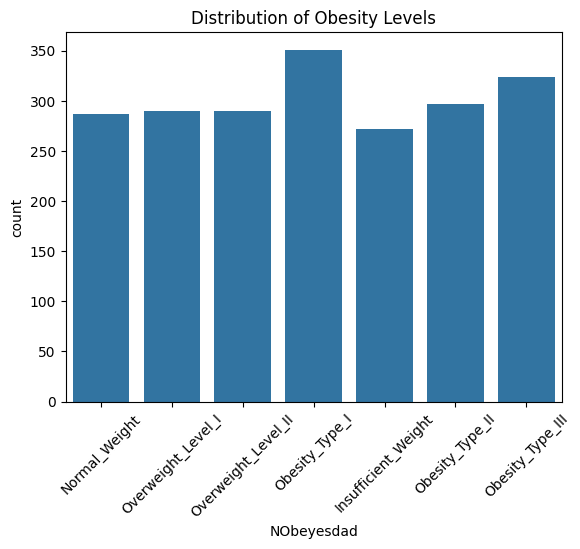

In [42]:
# Plot with labeled x-axis
sns.countplot(x='NObeyesdad', data=data_raw)
plt.title('Distribution of Obesity Levels')
plt.xticks(rotation=45)
plt.show()

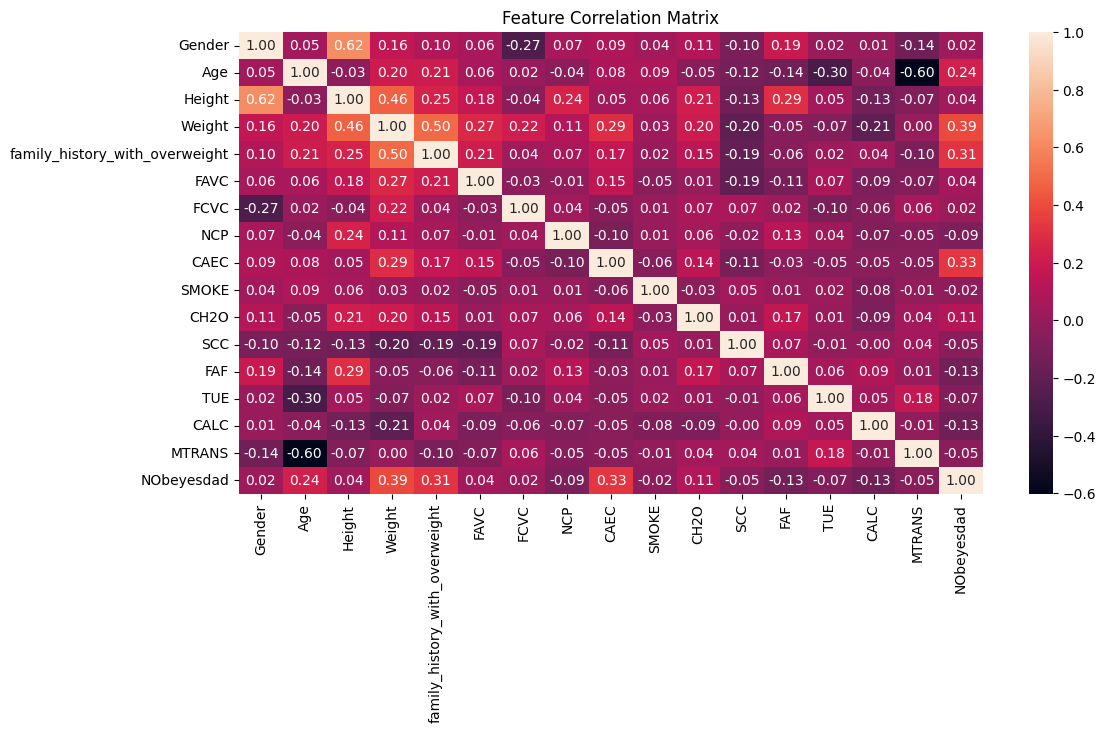

In [44]:
# Correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

In [9]:
#TODO: Add more EDA steps

## 5. Train-Test Split
Split the data into training and testing sets.

In [46]:
# TODO: Select refine features selections. Currently all features are being considered. 
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Model Training
Train multiple models and compare performance.

In [11]:
# TODO: We can add a few more models...
# NOTE: We can take this approach or run each model in separate cells. 

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')

Logistic Regression Accuracy: 0.65
Random Forest Accuracy: 0.96


## 7. Model Evaluation
Evaluate the best model with detailed metrics.

In [12]:
# TODO: Compare models performance 

## 9. Conclusion
Summarize model performance, key findings from feature importance analysis, and potential applications for public health resource allocation.

In [13]:
# TODO: Gather models results, pick the model with best accuracy and identify features to be used. 


----------------
$^{1}$ Mehrparvar, F. (2021). Obesity Levels. Kaggle. Retrieved November 9, 2024, from https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels/data